In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
#print(os.listdir("/kaggle/input/twitter-airline-sentiment"))
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# Any results you write to the current directory are saved as output.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jz3f19\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jz3f19\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jz3f19\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
p_df= pd.read_csv("Tweets.csv")
p_df.head()
#df.describe()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [9]:
p_df.fillna('-1', inplace=True)
p_df.to_csv('p_df__airline.csv')

In [10]:
p_df = pd.read_csv('p_df__airline.csv')

In [11]:
p_df.head()

,Unnamed: 0,Unnamed: 0.1,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,0,0,570306133677760513,neutral,1.0000,-1,-1.0000,Virgin America,-1,cairdin,-1,0,@VirginAmerica What @dhepburn said.,-1,2015-02-24 11:35:52 -0800,-1,Eastern Time (US & Canada)
1,1,1,570301130888122368,positive,0.3486,-1,0.0000,Virgin America,-1,jnardino,-1,0,@VirginAmerica plus you've added commercials t...,-1,2015-02-24 11:15:59 -0800,-1,Pacific Time (US & Canada)
2,2,2,570301083672813571,neutral,0.6837,-1,-1.0000,Virgin America,-1,yvonnalynn,-1,0,@VirginAmerica I didn't today... Must mean I n...,-1,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,3,3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,-1,jnardino,-1,0,@VirginAmerica it's really aggressive to blast...,-1,2015-02-24 11:15:36 -0800,-1,Pacific Time (US & Canada)
4,4,4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,-1,jnardino,-1,0,@VirginAmerica and it's a really big bad thing...,-1,2015-02-24 11:14:45 -0800,-1,Pacific Time (US & Canada)


In [18]:
p_df['text_cleaned'] = p_df[['negativereason', 'name', 'text']].apply(lambda x: ' '.join(x), axis=1)

In [19]:
p_df.head()

,Unnamed: 0,Unnamed: 0.1,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,text_cleaned
0,0,0,570306133677760513,neutral,1.0000,-1,-1.0000,Virgin America,-1,cairdin,-1,0,@VirginAmerica What @dhepburn said.,-1,2015-02-24 11:35:52 -0800,-1,Eastern Time (US & Canada),-1 cairdin @VirginAmerica What @dhepburn said.
1,1,1,570301130888122368,positive,0.3486,-1,0.0000,Virgin America,-1,jnardino,-1,0,@VirginAmerica plus you've added commercials t...,-1,2015-02-24 11:15:59 -0800,-1,Pacific Time (US & Canada),-1 jnardino @VirginAmerica plus you've added c...
2,2,2,570301083672813571,neutral,0.6837,-1,-1.0000,Virgin America,-1,yvonnalynn,-1,0,@VirginAmerica I didn't today... Must mean I n...,-1,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),-1 yvonnalynn @VirginAmerica I didn't today......
3,3,3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,-1,jnardino,-1,0,@VirginAmerica it's really aggressive to blast...,-1,2015-02-24 11:15:36 -0800,-1,Pacific Time (US & Canada),Bad Flight jnardino @VirginAmerica it's really...
4,4,4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,-1,jnardino,-1,0,@VirginAmerica and it's a really big bad thing...,-1,2015-02-24 11:14:45 -0800,-1,Pacific Time (US & Canada),Can't Tell jnardino @VirginAmerica and it's a ...


In [20]:
stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    clean_text2(text)
    return text


def clean_text2(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('@', '', text)
    return text

p_df['text_cleaned'] = p_df.text_cleaned.apply(lambda x: clean_text(x))

In [21]:
def clean(tweet): 
            
    # Special characters
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)    
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    
    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)   
            
    # Character entity references
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # Typos, slang and informal abbreviations
    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/", "with", tweet)
    tweet = re.sub(r"USAgov", "USA government", tweet)
    tweet = re.sub(r"recentlu", "recently", tweet)
    tweet = re.sub(r"Ph0tos", "Photos", tweet)
    tweet = re.sub(r"amirite", "am I right", tweet)
    tweet = re.sub(r"exp0sed", "exposed", tweet)
    tweet = re.sub(r"<3", "love", tweet)
    tweet = re.sub(r"amageddon", "armageddon", tweet)
    tweet = re.sub(r"Trfc", "Traffic", tweet)
    tweet = re.sub(r"8/5/2015", "2015-08-05", tweet)
    tweet = re.sub(r"WindStorm", "Wind Storm", tweet)
    tweet = re.sub(r"8/6/2015", "2015-08-06", tweet)
    tweet = re.sub(r"10:38PM", "10:38 PM", tweet)
    tweet = re.sub(r"10:30pm", "10:30 PM", tweet)
    tweet = re.sub(r"16yr", "16 year", tweet)
    tweet = re.sub(r"lmao", "laughing my ass off", tweet)   
    tweet = re.sub(r"TRAUMATISED", "traumatized", tweet)
    
    # Hashtags and usernames
    tweet = re.sub(r"IranDeal", "Iran Deal", tweet)
    tweet = re.sub(r"ArianaGrande", "Ariana Grande", tweet)
    tweet = re.sub(r"camilacabello97", "camila cabello", tweet) 
    tweet = re.sub(r"RondaRousey", "Ronda Rousey", tweet)     
    tweet = re.sub(r"MTVHottest", "MTV Hottest", tweet)
    tweet = re.sub(r"TrapMusic", "Trap Music", tweet)
    tweet = re.sub(r"ProphetMuhammad", "Prophet Muhammad", tweet)
    tweet = re.sub(r"PantherAttack", "Panther Attack", tweet)
    tweet = re.sub(r"StrategicPatience", "Strategic Patience", tweet)
    tweet = re.sub(r"socialnews", "social news", tweet)
    tweet = re.sub(r"NASAHurricane", "NASA Hurricane", tweet)
    tweet = re.sub(r"onlinecommunities", "online communities", tweet)
    tweet = re.sub(r"humanconsumption", "human consumption", tweet)
    tweet = re.sub(r"Typhoon-Devastated", "Typhoon Devastated", tweet)
    tweet = re.sub(r"Meat-Loving", "Meat Loving", tweet)
    tweet = re.sub(r"facialabuse", "facial abuse", tweet)
    tweet = re.sub(r"LakeCounty", "Lake County", tweet)
    tweet = re.sub(r"BeingAuthor", "Being Author", tweet)
    tweet = re.sub(r"withheavenly", "with heavenly", tweet)
    tweet = re.sub(r"thankU", "thank you", tweet)
    tweet = re.sub(r"iTunesMusic", "iTunes Music", tweet)
    tweet = re.sub(r"OffensiveContent", "Offensive Content", tweet)
    tweet = re.sub(r"WorstSummerJob", "Worst Summer Job", tweet)
    tweet = re.sub(r"HarryBeCareful", "Harry Be Careful", tweet)
    tweet = re.sub(r"NASASolarSystem", "NASA Solar System", tweet)
    tweet = re.sub(r"animalrescue", "animal rescue", tweet)
    tweet = re.sub(r"KurtSchlichter", "Kurt Schlichter", tweet)
    tweet = re.sub(r"aRmageddon", "armageddon", tweet)
    tweet = re.sub(r"Throwingknifes", "Throwing knives", tweet)
    tweet = re.sub(r"GodsLove", "God's Love", tweet)
    tweet = re.sub(r"bookboost", "book boost", tweet)
    tweet = re.sub(r"ibooklove", "I book love", tweet)
    tweet = re.sub(r"NestleIndia", "Nestle India", tweet)
    tweet = re.sub(r"realDonaldTrump", "Donald Trump", tweet)
    tweet = re.sub(r"DavidVonderhaar", "David Vonderhaar", tweet)
    tweet = re.sub(r"CecilTheLion", "Cecil The Lion", tweet)
    tweet = re.sub(r"weathernetwork", "weather network", tweet)
    tweet = re.sub(r"withBioterrorism&use", "with Bioterrorism & use", tweet)
    tweet = re.sub(r"Hostage&2", "Hostage & 2", tweet)
    tweet = re.sub(r"GOPDebate", "GOP Debate", tweet)
    tweet = re.sub(r"RickPerry", "Rick Perry", tweet)
    tweet = re.sub(r"frontpage", "front page", tweet)
    tweet = re.sub(r"NewsInTweets", "News In Tweets", tweet)
    tweet = re.sub(r"ViralSpell", "Viral Spell", tweet)
    tweet = re.sub(r"til_now", "until now", tweet)
    tweet = re.sub(r"volcanoinRussia", "volcano in Russia", tweet)
    tweet = re.sub(r"ZippedNews", "Zipped News", tweet)
    tweet = re.sub(r"MicheleBachman", "Michele Bachman", tweet)
    tweet = re.sub(r"53inch", "53 inch", tweet)
    tweet = re.sub(r"KerrickTrial", "Kerrick Trial", tweet)
    tweet = re.sub(r"abstorm", "Alberta Storm", tweet)
    tweet = re.sub(r"Beyhive", "Beyonce hive", tweet)
    tweet = re.sub(r"IDFire", "Idaho Fire", tweet)
    tweet = re.sub(r"DETECTADO", "Detected", tweet)
    tweet = re.sub(r"RockyFire", "Rocky Fire", tweet)
    tweet = re.sub(r"Listen/Buy", "Listen / Buy", tweet)
    tweet = re.sub(r"NickCannon", "Nick Cannon", tweet)
    tweet = re.sub(r"FaroeIslands", "Faroe Islands", tweet)
    tweet = re.sub(r"yycstorm", "Calgary Storm", tweet)
    tweet = re.sub(r"IDPs:", "Internally Displaced People :", tweet)
    tweet = re.sub(r"ArtistsUnited", "Artists United", tweet)
    tweet = re.sub(r"ClaytonBryant", "Clayton Bryant", tweet)
    tweet = re.sub(r"jimmyfallon", "jimmy fallon", tweet)
    tweet = re.sub(r"justinbieber", "justin bieber", tweet)  
    tweet = re.sub(r"UTC2015", "UTC 2015", tweet)
    tweet = re.sub(r"Time2015", "Time 2015", tweet)
    tweet = re.sub(r"djicemoon", "dj icemoon", tweet)
    tweet = re.sub(r"LivingSafely", "Living Safely", tweet)
    tweet = re.sub(r"FIFA16", "Fifa 2016", tweet)
    tweet = re.sub(r"thisiswhywecanthavenicethings", "this is why we cannot have nice things", tweet)
    tweet = re.sub(r"bbcnews", "bbc news", tweet)
    tweet = re.sub(r"UndergroundRailraod", "Underground Railraod", tweet)
    tweet = re.sub(r"c4news", "c4 news", tweet)
    tweet = re.sub(r"OBLITERATION", "obliteration", tweet)
    tweet = re.sub(r"MUDSLIDE", "mudslide", tweet)
    tweet = re.sub(r"NoSurrender", "No Surrender", tweet)
    tweet = re.sub(r"NotExplained", "Not Explained", tweet)
    tweet = re.sub(r"greatbritishbakeoff", "great british bake off", tweet)
    tweet = re.sub(r"LondonFire", "London Fire", tweet)
    tweet = re.sub(r"KOTAWeather", "KOTA Weather", tweet)
    tweet = re.sub(r"LuchaUnderground", "Lucha Underground", tweet)
    tweet = re.sub(r"KOIN6News", "KOIN 6 News", tweet)
    tweet = re.sub(r"LiveOnK2", "Live On K2", tweet)
    tweet = re.sub(r"9NewsGoldCoast", "9 News Gold Coast", tweet)
    tweet = re.sub(r"nikeplus", "nike plus", tweet)
    tweet = re.sub(r"david_cameron", "David Cameron", tweet)
    tweet = re.sub(r"peterjukes", "Peter Jukes", tweet)
    tweet = re.sub(r"JamesMelville", "James Melville", tweet)
    tweet = re.sub(r"megynkelly", "Megyn Kelly", tweet)
    tweet = re.sub(r"cnewslive", "C News Live", tweet)
    tweet = re.sub(r"JamaicaObserver", "Jamaica Observer", tweet)
    tweet = re.sub(r"TweetLikeItsSeptember11th2001", "Tweet like it is september 11th 2001", tweet)
    tweet = re.sub(r"cbplawyers", "cbp lawyers", tweet)
    tweet = re.sub(r"fewmoretweets", "few more tweets", tweet)
    tweet = re.sub(r"BlackLivesMatter", "Black Lives Matter", tweet)
    tweet = re.sub(r"cjoyner", "Chris Joyner", tweet)
    tweet = re.sub(r"ENGvAUS", "England vs Australia", tweet)
    tweet = re.sub(r"ScottWalker", "Scott Walker", tweet)
    tweet = re.sub(r"MikeParrActor", "Michael Parr", tweet)
    tweet = re.sub(r"4PlayThursdays", "Foreplay Thursdays", tweet)
    tweet = re.sub(r"TGF2015", "Tontitown Grape Festival", tweet)
    tweet = re.sub(r"realmandyrain", "Mandy Rain", tweet)
    tweet = re.sub(r"GraysonDolan", "Grayson Dolan", tweet)
    tweet = re.sub(r"ApolloBrown", "Apollo Brown", tweet)
    tweet = re.sub(r"saddlebrooke", "Saddlebrooke", tweet)
    tweet = re.sub(r"TontitownGrape", "Tontitown Grape", tweet)
    tweet = re.sub(r"AbbsWinston", "Abbs Winston", tweet)
    tweet = re.sub(r"ShaunKing", "Shaun King", tweet)
    tweet = re.sub(r"MeekMill", "Meek Mill", tweet)
    tweet = re.sub(r"TornadoGiveaway", "Tornado Giveaway", tweet)
    tweet = re.sub(r"GRupdates", "GR updates", tweet)
    tweet = re.sub(r"SouthDowns", "South Downs", tweet)
    tweet = re.sub(r"braininjury", "brain injury", tweet)
    tweet = re.sub(r"auspol", "Australian politics", tweet)
    tweet = re.sub(r"PlannedParenthood", "Planned Parenthood", tweet)
    tweet = re.sub(r"calgaryweather", "Calgary Weather", tweet)
    tweet = re.sub(r"weallheartonedirection", "we all heart one direction", tweet)
    tweet = re.sub(r"edsheeran", "Ed Sheeran", tweet)
    tweet = re.sub(r"TrueHeroes", "True Heroes", tweet)
    tweet = re.sub(r"S3XLEAK", "sex leak", tweet)
    tweet = re.sub(r"ComplexMag", "Complex Magazine", tweet)
    tweet = re.sub(r"TheAdvocateMag", "The Advocate Magazine", tweet)
    tweet = re.sub(r"CityofCalgary", "City of Calgary", tweet)
    tweet = re.sub(r"EbolaOutbreak", "Ebola Outbreak", tweet)
    tweet = re.sub(r"SummerFate", "Summer Fate", tweet)
    tweet = re.sub(r"RAmag", "Royal Academy Magazine", tweet)
    tweet = re.sub(r"offers2go", "offers to go", tweet)
    tweet = re.sub(r"foodscare", "food scare", tweet)
    tweet = re.sub(r"MNPDNashville", "Metropolitan Nashville Police Department", tweet)
    tweet = re.sub(r"TfLBusAlerts", "TfL Bus Alerts", tweet)
    tweet = re.sub(r"GamerGate", "Gamer Gate", tweet)
    tweet = re.sub(r"IHHen", "Humanitarian Relief", tweet)
    tweet = re.sub(r"spinningbot", "spinning bot", tweet)
    tweet = re.sub(r"ModiMinistry", "Modi Ministry", tweet)
    tweet = re.sub(r"TAXIWAYS", "taxi ways", tweet)
    tweet = re.sub(r"Calum5SOS", "Calum Hood", tweet)
    tweet = re.sub(r"po_st", "po.st", tweet)
    tweet = re.sub(r"scoopit", "scoop.it", tweet)
    tweet = re.sub(r"UltimaLucha", "Ultima Lucha", tweet)
    tweet = re.sub(r"JonathanFerrell", "Jonathan Ferrell", tweet)
    tweet = re.sub(r"aria_ahrary", "Aria Ahrary", tweet)
    tweet = re.sub(r"rapidcity", "Rapid City", tweet)
    tweet = re.sub(r"OutBid", "outbid", tweet)
    tweet = re.sub(r"lavenderpoetrycafe", "lavender poetry cafe", tweet)
    tweet = re.sub(r"EudryLantiqua", "Eudry Lantiqua", tweet)
    tweet = re.sub(r"15PM", "15 PM", tweet)
    tweet = re.sub(r"OriginalFunko", "Funko", tweet)
    tweet = re.sub(r"rightwaystan", "Richard Tan", tweet)
    tweet = re.sub(r"CindyNoonan", "Cindy Noonan", tweet)
    tweet = re.sub(r"RT_America", "RT America", tweet)
    tweet = re.sub(r"narendramodi", "Narendra Modi", tweet)
    tweet = re.sub(r"BakeOffFriends", "Bake Off Friends", tweet)
    tweet = re.sub(r"TeamHendrick", "Hendrick Motorsports", tweet)
    tweet = re.sub(r"alexbelloli", "Alex Belloli", tweet)
    tweet = re.sub(r"itsjustinstuart", "Justin Stuart", tweet)
    tweet = re.sub(r"gunsense", "gun sense", tweet)
    tweet = re.sub(r"DebateQuestionsWeWantToHear", "debate questions we want to hear", tweet)
    tweet = re.sub(r"RoyalCarribean", "Royal Carribean", tweet)
    tweet = re.sub(r"samanthaturne19", "Samantha Turner", tweet)
    tweet = re.sub(r"JonVoyage", "Jon Stewart", tweet)
    tweet = re.sub(r"renew911health", "renew 911 health", tweet)
    tweet = re.sub(r"SuryaRay", "Surya Ray", tweet)
    tweet = re.sub(r"pattonoswalt", "Patton Oswalt", tweet)
    tweet = re.sub(r"minhazmerchant", "Minhaz Merchant", tweet)
    tweet = re.sub(r"TLVFaces", "Israel Diaspora Coalition", tweet)
    tweet = re.sub(r"pmarca", "Marc Andreessen", tweet)
    tweet = re.sub(r"pdx911", "Portland Police", tweet)
    tweet = re.sub(r"jamaicaplain", "Jamaica Plain", tweet)
    tweet = re.sub(r"Japton", "Arkansas", tweet)
    tweet = re.sub(r"RouteComplex", "Route Complex", tweet)
    tweet = re.sub(r"INSubcontinent", "Indian Subcontinent", tweet)
    tweet = re.sub(r"NJTurnpike", "New Jersey Turnpike", tweet)
    tweet = re.sub(r"Politifiact", "PolitiFact", tweet)
    tweet = re.sub(r"Hiroshima70", "Hiroshima", tweet)
    tweet = re.sub(r"GMMBC", "Greater Mt Moriah Baptist Church", tweet)
    tweet = re.sub(r"versethe", "verse the", tweet)
    tweet = re.sub(r"TubeStrike", "Tube Strike", tweet)
    tweet = re.sub(r"MissionHills", "Mission Hills", tweet)
    tweet = re.sub(r"ProtectDenaliWolves", "Protect Denali Wolves", tweet)
    tweet = re.sub(r"NANKANA", "Nankana", tweet)
    tweet = re.sub(r"SAHIB", "Sahib", tweet)
    tweet = re.sub(r"PAKPATTAN", "Pakpattan", tweet)
    tweet = re.sub(r"Newz_Sacramento", "News Sacramento", tweet)
    tweet = re.sub(r"gofundme", "go fund me", tweet)
    tweet = re.sub(r"pmharper", "Stephen Harper", tweet)
    tweet = re.sub(r"IvanBerroa", "Ivan Berroa", tweet)
    tweet = re.sub(r"LosDelSonido", "Los Del Sonido", tweet)
    tweet = re.sub(r"bancodeseries", "banco de series", tweet)
    tweet = re.sub(r"timkaine", "Tim Kaine", tweet)
    tweet = re.sub(r"IdentityTheft", "Identity Theft", tweet)
    tweet = re.sub(r"AllLivesMatter", "All Lives Matter", tweet)
    tweet = re.sub(r"mishacollins", "Misha Collins", tweet)
    tweet = re.sub(r"BillNeelyNBC", "Bill Neely", tweet)
    tweet = re.sub(r"BeClearOnCancer", "be clear on cancer", tweet)
    tweet = re.sub(r"Kowing", "Knowing", tweet)
    tweet = re.sub(r"ScreamQueens", "Scream Queens", tweet)
    tweet = re.sub(r"AskCharley", "Ask Charley", tweet)
    tweet = re.sub(r"BlizzHeroes", "Heroes of the Storm", tweet)
    tweet = re.sub(r"BradleyBrad47", "Bradley Brad", tweet)
    tweet = re.sub(r"HannaPH", "Typhoon Hanna", tweet)
    tweet = re.sub(r"meinlcymbals", "MEINL Cymbals", tweet)
    tweet = re.sub(r"Ptbo", "Peterborough", tweet)
    tweet = re.sub(r"cnnbrk", "CNN Breaking News", tweet)
    tweet = re.sub(r"IndianNews", "Indian News", tweet)
    tweet = re.sub(r"savebees", "save bees", tweet)
    tweet = re.sub(r"GreenHarvard", "Green Harvard", tweet)
    tweet = re.sub(r"StandwithPP", "Stand with planned parenthood", tweet)
    tweet = re.sub(r"hermancranston", "Herman Cranston", tweet)
    tweet = re.sub(r"WMUR9", "WMUR-TV", tweet)
    tweet = re.sub(r"RockBottomRadFM", "Rock Bottom Radio", tweet)
    tweet = re.sub(r"ameenshaikh3", "Ameen Shaikh", tweet)
    tweet = re.sub(r"ProSyn", "Project Syndicate", tweet)
    tweet = re.sub(r"Daesh", "ISIS", tweet)
    tweet = re.sub(r"s2g", "swear to god", tweet)
    tweet = re.sub(r"listenlive", "listen live", tweet)
    tweet = re.sub(r"CDCgov", "Centers for Disease Control and Prevention", tweet)
    tweet = re.sub(r"FoxNew", "Fox News", tweet)
    tweet = re.sub(r"CBSBigBrother", "Big Brother", tweet)
    tweet = re.sub(r"JulieDiCaro", "Julie DiCaro", tweet)
    tweet = re.sub(r"theadvocatemag", "The Advocate Magazine", tweet)
    tweet = re.sub(r"RohnertParkDPS", "Rohnert Park Police Department", tweet)
    tweet = re.sub(r"THISIZBWRIGHT", "Bonnie Wright", tweet)
    tweet = re.sub(r"Popularmmos", "Popular MMOs", tweet)
    tweet = re.sub(r"WildHorses", "Wild Horses", tweet)
    tweet = re.sub(r"FantasticFour", "Fantastic Four", tweet)
    tweet = re.sub(r"HORNDALE", "Horndale", tweet)
    tweet = re.sub(r"PINER", "Piner", tweet)
    tweet = re.sub(r"BathAndNorthEastSomerset", "Bath and North East Somerset", tweet)
    tweet = re.sub(r"thatswhatfriendsarefor", "that is what friends are for", tweet)
    tweet = re.sub(r"residualincome", "residual income", tweet)
    tweet = re.sub(r"YahooNewsDigest", "Yahoo News Digest", tweet)
    tweet = re.sub(r"MalaysiaAirlines", "Malaysia Airlines", tweet)
    tweet = re.sub(r"AmazonDeals", "Amazon Deals", tweet)
    tweet = re.sub(r"MissCharleyWebb", "Charley Webb", tweet)
    tweet = re.sub(r"shoalstraffic", "shoals traffic", tweet)
    tweet = re.sub(r"GeorgeFoster72", "George Foster", tweet)
    tweet = re.sub(r"pop2015", "pop 2015", tweet)
    tweet = re.sub(r"_PokemonCards_", "Pokemon Cards", tweet)
    tweet = re.sub(r"DianneG", "Dianne Gallagher", tweet)
    tweet = re.sub(r"KashmirConflict", "Kashmir Conflict", tweet)
    tweet = re.sub(r"BritishBakeOff", "British Bake Off", tweet)
    tweet = re.sub(r"FreeKashmir", "Free Kashmir", tweet)
    tweet = re.sub(r"mattmosley", "Matt Mosley", tweet)
    tweet = re.sub(r"BishopFred", "Bishop Fred", tweet)
    tweet = re.sub(r"EndConflict", "End Conflict", tweet)
    tweet = re.sub(r"EndOccupation", "End Occupation", tweet)
    tweet = re.sub(r"UNHEALED", "unhealed", tweet)
    tweet = re.sub(r"CharlesDagnall", "Charles Dagnall", tweet)
    tweet = re.sub(r"Latestnews", "Latest news", tweet)
    tweet = re.sub(r"KindleCountdown", "Kindle Countdown", tweet)
    tweet = re.sub(r"NoMoreHandouts", "No More Handouts", tweet)
    tweet = re.sub(r"datingtips", "dating tips", tweet)
    tweet = re.sub(r"charlesadler", "Charles Adler", tweet)
    tweet = re.sub(r"twia", "Texas Windstorm Insurance Association", tweet)
    tweet = re.sub(r"txlege", "Texas Legislature", tweet)
    tweet = re.sub(r"WindstormInsurer", "Windstorm Insurer", tweet)
           
    # Urls
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
    tweet = re.sub(r"https:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
        
    # Words with punctuations and special characters
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        tweet = tweet.replace(p, f' {p} ')
        
    # ... and ..
    tweet = tweet.replace('...', ' ... ')
    if '...' not in tweet:
        tweet = tweet.replace('..', ' ... ')      
    
    if '@' in tweet:
        tweet = tweet.replace('@', '')

    # Acronyms
    tweet = re.sub(r"MH370", "Malaysia Airlines Flight 370", tweet)
    tweet = re.sub(r"mÌ¼sica", "music", tweet)
    tweet = re.sub(r"okwx", "Oklahoma City Weather", tweet)
    tweet = re.sub(r"arwx", "Arkansas Weather", tweet)    
    tweet = re.sub(r"gawx", "Georgia Weather", tweet)  
    tweet = re.sub(r"scwx", "South Carolina Weather", tweet)  
    tweet = re.sub(r"cawx", "California Weather", tweet)
    tweet = re.sub(r"tnwx", "Tennessee Weather", tweet)
    tweet = re.sub(r"azwx", "Arizona Weather", tweet)    
    tweet = re.sub(r"wordpressdotcom", "wordpress", tweet)    
    tweet = re.sub(r"usNWSgov", "United States National Weather Service", tweet)
    tweet = re.sub(r"Suruc", "Sanliurfa", tweet)   
    
    # Grouping same words without embeddings
    tweet = re.sub(r"Bestnaijamade", "bestnaijamade", tweet)
    tweet = re.sub(r"SOUDELOR", "Soudelor", tweet)
    
    return tweet

#p_df['text_cleaned'] = p_df['text'].apply(lambda s : clean(s))
p_df['text_cleaned'] = p_df.text_cleaned.apply(lambda x: clean(x))

In [22]:
p_df.head()

,Unnamed: 0,Unnamed: 0.1,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,text_cleaned
0,0,0,570306133677760513,neutral,1.0000,-1,-1.0000,Virgin America,-1,cairdin,-1,0,@VirginAmerica What @dhepburn said.,-1,2015-02-24 11:35:52 -0800,-1,Eastern Time (US & Canada),1 cairdin virginamerica dhepburn say
1,1,1,570301130888122368,positive,0.3486,-1,0.0000,Virgin America,-1,jnardino,-1,0,@VirginAmerica plus you've added commercials t...,-1,2015-02-24 11:15:59 -0800,-1,Pacific Time (US & Canada),1 jnardino virginamerica plus you have add com...
2,2,2,570301083672813571,neutral,0.6837,-1,-1.0000,Virgin America,-1,yvonnalynn,-1,0,@VirginAmerica I didn't today... Must mean I n...,-1,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),1 yvonnalynn virginamerica didnt today must me...
3,3,3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,-1,jnardino,-1,0,@VirginAmerica it's really aggressive to blast...,-1,2015-02-24 11:15:36 -0800,-1,Pacific Time (US & Canada),bad flight jnardino virginamerica really aggre...
4,4,4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,-1,jnardino,-1,0,@VirginAmerica and it's a really big bad thing...,-1,2015-02-24 11:14:45 -0800,-1,Pacific Time (US & Canada),cant tell jnardino virginamerica really big ba...


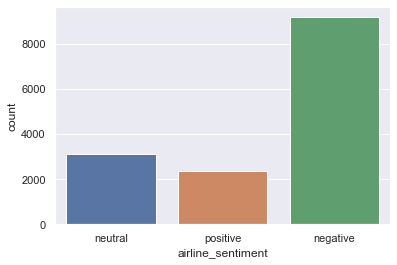

In [24]:
import seaborn as sns

sns.set(style="darkgrid")
ax = sns.countplot(x=p_df['airline_sentiment'], data=p_df)
#ax.set_xticklabels(['Positive', 'Netural','Negative'])

In [25]:
p_df['sentiment'] = 0
for i in range(len(p_df['airline_sentiment'])):
    if p_df['airline_sentiment'][i] == 'positive':
        p_df['sentiment'][i] = 0
    elif p_df['airline_sentiment'][i] == 'neutral':
        p_df['sentiment'][i] = 1
    else:
        p_df['sentiment'][i] = 2

C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
def list2str(words):
    tempstr = ''
    for word in words:
        if len(word) > 2:
            tempstr += word.lower() + ' ' #这种拼接效率低
    return tempstr


def keepwords(text):
    temp = re.sub('[^a-zA-Z]', ' ', text)
    return temp.lower()


def removeShortWord(text):
    words = nltk.word_tokenize(text)
    stops = set(stopwords.words('english'))
    words = [word for word in words if len(word) > 2 and word not in stops] # if w not in stops
    res = list2str(words)
    return res

def removeUseless(tweet):
    #tweet = re.sub("http:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
    tweet = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', tweet, flags=re.MULTILINE)
    #tweet = re.sub('\W+', ' ', tweet).replace("_", '')
    tweet = re.sub(u"([^\u0061-\u007a\u0041-\u005a])"," ",tweet)
    #tweet
    return tweet


In [27]:
p_df['text_cleaned'] = p_df.text_cleaned.apply(lambda x: removeUseless(x))
p_df['text_cleaned'] = p_df.text_cleaned.apply(lambda x: removeShortWord(x))

In [28]:
pd.set_option('display.max_colwidth', -1)
p_df.head()

,Unnamed: 0,Unnamed: 0.1,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,text_cleaned,sentiment
0,0,0,570306133677760513,neutral,1.0000,-1,-1.0000,Virgin America,-1,cairdin,-1,0,@VirginAmerica What @dhepburn said.,-1,2015-02-24 11:35:52 -0800,-1,Eastern Time (US & Canada),cairdin virginamerica dhepburn say,1
1,1,1,570301130888122368,positive,0.3486,-1,0.0000,Virgin America,-1,jnardino,-1,0,@VirginAmerica plus you've added commercials to the experience... tacky.,-1,2015-02-24 11:15:59 -0800,-1,Pacific Time (US & Canada),jnardino virginamerica plus add commercial experience tacky,0
2,2,2,570301083672813571,neutral,0.6837,-1,-1.0000,Virgin America,-1,yvonnalynn,-1,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,-1,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),yvonnalynn virginamerica didnt today must mean need take another trip,1
3,3,3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,-1,jnardino,-1,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",-1,2015-02-24 11:15:36 -0800,-1,Pacific Time (US & Canada),bad flight jnardino virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse,2
4,4,4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,-1,jnardino,-1,0,@VirginAmerica and it's a really big bad thing about it,-1,2015-02-24 11:14:45 -0800,-1,Pacific Time (US & Canada),cant tell jnardino virginamerica really big bad thing,2


In [29]:
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

from keras.layers import Dense, Input, LSTM, Bidirectional, Activation, Conv1D, GRU, TimeDistributed
from keras.layers import Dropout, Embedding, GlobalMaxPooling1D, MaxPooling1D, Add, Flatten, SpatialDropout1D
from keras.layers import GlobalAveragePooling1D, BatchNormalization, concatenate
from keras.layers import Reshape, merge, Concatenate, Lambda, Average
from keras.models import Sequential, Model, load_model
from keras.callbacks import ModelCheckpoint
from keras.initializers import Constant
from keras.layers.merge import add

from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

nltk.download('punkt')

Using TensorFlow backend.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jz3f19\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(p_df.text_cleaned)
p_df_X = tokenizer.texts_to_sequences(p_df.text_cleaned)

In [31]:
p_df['words'] = p_df_X
p_df['word_length'] = p_df.words.apply(lambda i: len(i))
p_df = p_df[p_df.word_length >= 5]

In [32]:
sentiments = p_df.groupby('airline_sentiment').size().index.tolist()
sen_int = {}
int_category = {}
for i, k in enumerate(sentiments):
    sen_int.update({k:i})
    int_category.update({i:k})

p_df['c2id'] = p_df['airline_sentiment'].apply(lambda x: sen_int[x])

In [33]:
#用词包做词嵌入，事先导入别人预训练好的词向量模型来做词嵌入
word_index = tokenizer.word_index
EMBEDDING_DIM = 100
embeddings_index = {}
f = open('glove.6B.100d.txt',  encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s unique tokens.' % len(word_index))
print('Total %s word vectors.' % len(embeddings_index))

Found 19874 unique tokens.
Total 400000 word vectors.


In [34]:
# using 50 for padding length
max_features = 50000# 5k max features
maxlen = 50
X = list(sequence.pad_sequences(p_df.words, maxlen=maxlen))
#做词嵌入，构建模型，用默认参数


#all_embs = np.stack(embeddings_index.values())
#emb_mean,emb_std = all_embs.mean(), all_embs.std()
#embed_size = all_embs.shape[1]

#nb_words = min(max_features, len(word_index))

#change below line if computing normal stats is too slow
#embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))


for word, i in word_index.items():
    #if i >= max_features:
    #    continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

        
        
        
embedding_layer = Embedding(len(word_index)+1,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=maxlen,
                            trainable=False)

W0518 17:59:26.207656  1844 deprecation_wrapper.py:119] From C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [35]:
X = np.array(X)
Y = np_utils.to_categorical(list(p_df.c2id))
seed = 29
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=seed)

In [36]:
# 构建模型TextCNN
inp = Input(shape=(maxlen,), dtype='int32')
embedding = embedding_layer(inp)
stacks = []
for kernel_size in [2, 3, 4]:
    conv = Conv1D(64, kernel_size, padding='same', activation='relu', strides=1)(embedding)
    pool = MaxPooling1D(pool_size=3)(conv)
    drop = Dropout(0.5)(pool)
    stacks.append(drop)

merged = Concatenate()(stacks)
flatten = Flatten()(merged)
drop = Dropout(0.5)(flatten)

outp = Dense(len(int_category), activation='softmax')(drop)

TextCNN = Model(inputs=inp, outputs=outp)
TextCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

TextCNN.summary()

W0518 17:59:26.239544  1844 deprecation_wrapper.py:119] From C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0518 17:59:26.287443  1844 deprecation_wrapper.py:119] From C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0518 17:59:26.306391  1844 deprecation_wrapper.py:119] From C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0518 17:59:26.309383  1844 deprecation_wrapper.py:119] From C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0518 17:59:26.315368  1844 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 50, 100)      1987500     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 50, 64)       12864       embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 50, 64)       19264       embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_3 (

In [37]:
textcnn_history = TextCNN.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))

W0518 17:59:26.545747  1844 deprecation.py:323] From C:\Apps\Anaconda3\envs\gpu-cuda10\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 11126 samples, validate on 2782 samples
Epoch 1/20
11126/11126 [==============================] - 4s 348us/step - loss: 0.5846 - acc: 0.7532 - val_loss: 0.3625 - val_acc: 0.8742
Epoch 2/20
11126/11126 [==============================] - 0s 42us/step - loss: 0.3220 - acc: 0.8726 - val_loss: 0.2445 - val_acc: 0.9058
Epoch 3/20
11126/11126 [==============================] - 0s 39us/step - loss: 0.2479 - acc: 0.8991 - val_loss: 0.1993 - val_acc: 0.9227
Epoch 4/20
11126/11126 [==============================] - 0s 40us/step - loss: 0.2099 - acc: 0.9155 - val_loss: 0.1797 - val_acc: 0.9267
Epoch 5/20
11126/11126 [==============================] - 0s 42us/step - loss: 0.1907 - acc: 0.9244 - val_loss: 0.1785 - val_acc: 0.9249
Epoch 6/20
11126/11126 [==============================] - 0s 41us/step - loss: 0.1772 - acc: 0.9285 - val_loss: 0.1677 - val_acc: 0.9306
Epoch 7/20
11126/11126 [==============================] - 0s 40us/step - loss: 0.1689 - acc: 0.9290 - val_loss: 0.1701 - val_acc

In [38]:
inp = Input(shape=(maxlen,), dtype='int32')
x = embedding_layer(inp)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(GRU(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
x = Conv1D(64, kernel_size=3)(x)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
x = concatenate([avg_pool, max_pool])
outp = Dense(len(int_category), activation="softmax")(x)

BiGRU = Model(inp, outp)
BiGRU.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

BiGRU.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 50, 100)      1987500     input_2[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDro (None, 50, 100)      0           embedding_1[1][0]                
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 50, 256)      175872      spatial_dropout1d_1[0][0]        
__________________________________________________________________________________________________
conv1d_4 (

In [39]:
bigru_history = BiGRU.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))

Train on 11126 samples, validate on 2782 samples
Epoch 1/20
11126/11126 [==============================] - 11s 946us/step - loss: 0.3868 - acc: 0.8389 - val_loss: 0.1777 - val_acc: 0.9231
Epoch 2/20
11126/11126 [==============================] - 9s 817us/step - loss: 0.1783 - acc: 0.9213 - val_loss: 0.1549 - val_acc: 0.9378
Epoch 3/20
11126/11126 [==============================] - 9s 805us/step - loss: 0.1574 - acc: 0.9320 - val_loss: 0.1555 - val_acc: 0.9357
Epoch 4/20
11126/11126 [==============================] - 9s 803us/step - loss: 0.1458 - acc: 0.9369 - val_loss: 0.1500 - val_acc: 0.9364
Epoch 5/20
11126/11126 [==============================] - 9s 807us/step - loss: 0.1409 - acc: 0.9401 - val_loss: 0.1345 - val_acc: 0.9472
Epoch 6/20
11126/11126 [==============================] - 9s 813us/step - loss: 0.1331 - acc: 0.9436 - val_loss: 0.1346 - val_acc: 0.9475
Epoch 7/20
11126/11126 [==============================] - 9s 795us/step - loss: 0.1251 - acc: 0.9473 - val_loss: 0.1363 - 

In [40]:
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')
        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)
        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3
        print(self.W_constraint)
        print('{}_W'.format(self.name))
        print(self.W_regularizer)
        print((input_shape[-1],))
        self.W = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]
        if self.bias:
            self.b = self.add_weight(shape=(input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None
        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim
        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)), K.reshape(self.W, (features_dim, 1))), (-1, step_dim))
        if self.bias:
            eij += self.b
        eij = K.tanh(eij)
        a = K.exp(eij)
        if mask is not None:
            a *= K.cast(mask, K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim
    

lstm_layer = LSTM(300, dropout=0.25, recurrent_dropout=0.25, return_sequences=True)

inp = Input(shape=(maxlen,), dtype='int32')
embedding= embedding_layer(inp)
x = lstm_layer(embedding)
x = Dropout(0.25)(x)
print(x)
merged = Attention(maxlen)(x)
merged = Dense(256, activation='relu')(merged)
merged = Dropout(0.25)(merged)
merged = BatchNormalization()(merged)
outp = Dense(len(int_category), activation='softmax')(merged)

AttentionLSTM = Model(inputs=inp, outputs=outp)
AttentionLSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

AttentionLSTM.summary()

Tensor("dropout_5/cond/Merge:0", shape=(?, ?, 300), dtype=float32)
None
attention_1_W
None
(300,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 100)           1987500   
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 300)           481200    
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 300)           0         
_________________________________________________________________
attention_1 (Attention)      (None, 300)               350       
_________________________________________________________________
dense_3 (Dense)              (None, 256)               77056     
____________________________________________

In [41]:
attlstm_history = AttentionLSTM.fit(x_train, 
                                    y_train, 
                                    batch_size=128, 
                                    epochs=20, 
                                    validation_data=(x_val, y_val))

Train on 11126 samples, validate on 2782 samples
Epoch 1/20
11126/11126 [==============================] - 9s 798us/step - loss: 0.4053 - acc: 0.8264 - val_loss: 0.2234 - val_acc: 0.8936
Epoch 2/20
11126/11126 [==============================] - 7s 672us/step - loss: 0.2030 - acc: 0.9107 - val_loss: 0.1816 - val_acc: 0.9242
Epoch 3/20
11126/11126 [==============================] - 7s 668us/step - loss: 0.1794 - acc: 0.9216 - val_loss: 0.1616 - val_acc: 0.9306
Epoch 4/20
11126/11126 [==============================] - 7s 655us/step - loss: 0.1668 - acc: 0.9281 - val_loss: 0.1608 - val_acc: 0.9321
Epoch 5/20
11126/11126 [==============================] - 7s 657us/step - loss: 0.1609 - acc: 0.9320 - val_loss: 0.1650 - val_acc: 0.9335
Epoch 6/20
11126/11126 [==============================] - 7s 657us/step - loss: 0.1580 - acc: 0.9311 - val_loss: 0.1558 - val_acc: 0.9339
Epoch 7/20
11126/11126 [==============================] - 7s 660us/step - loss: 0.1525 - acc: 0.9350 - val_loss: 0.1551 - v

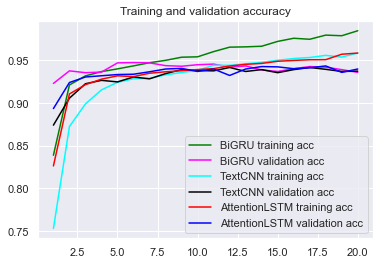

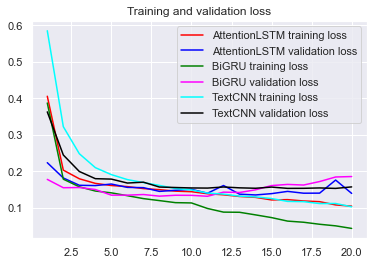

In [42]:
acc = attlstm_history.history['acc']
val_acc = attlstm_history.history['val_acc']
loss = attlstm_history.history['loss']
val_loss = attlstm_history.history['val_loss']
epochs = range(1, len(acc) + 1)

textacc = textcnn_history.history['acc']
textval_acc = textcnn_history.history['val_acc']
textloss = textcnn_history.history['loss']
textval_loss = textcnn_history.history['val_loss']



biacc = bigru_history.history['acc']
bival_acc = bigru_history.history['val_acc']
biloss = bigru_history.history['loss']
bival_loss = bigru_history.history['val_loss']


#plt.title('Training and validation accuracy')
plt.plot(epochs, biacc, 'green', label='BiGRU training acc')
plt.plot(epochs, bival_acc, 'Magenta', label='BiGRU validation acc')

plt.plot(epochs, textacc, 'cyan', label='TextCNN training acc')
plt.plot(epochs, textval_acc, 'black', label='TextCNN validation acc')


plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='AttentionLSTM training acc')
plt.plot(epochs, val_acc, 'blue', label='AttentionLSTM validation acc')
plt.legend()
plt.grid(True)
plt.figure()



plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='AttentionLSTM training loss')
plt.plot(epochs, val_loss, 'blue', label='AttentionLSTM validation loss')
plt.plot(epochs, biloss, 'green', label='BiGRU training loss')
plt.plot(epochs, bival_loss, 'Magenta', label='BiGRU validation loss')
plt.plot(epochs, textloss, 'cyan', label='TextCNN training loss')
plt.plot(epochs, textval_loss, 'black', label='TextCNN validation loss')
plt.legend()
plt.grid(True)
plt.show()

,0,1,2
0,1815,0,0
1,2,443,88
2,0,77,357


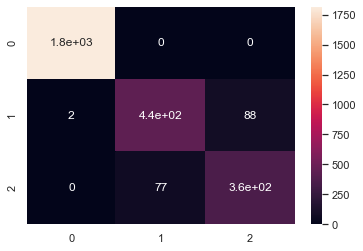

In [46]:
predicted = AttentionLSTM.predict(x_val)
cm = pd.DataFrame(confusion_matrix(y_val.argmax(axis=1), predicted.argmax(axis=1)))
from IPython.display import display
pd.options.display.max_columns = None
display(cm)
import seaborn as sns
sns.heatmap(cm, annot=True)

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


def evaluate_accuracy(model):
    predicted = model.predict(x_val)
    #print(classification_report(y_val, predicted))
    diff = y_val.argmax(axis=-1) - predicted.argmax(axis=-1)
    corrects = np.where(diff == 0)[0].shape[0]
    total = y_val.shape[0]
    return float(corrects/total)
print("model TextCNN accuracy:          %.6f" % evaluate_accuracy(TextCNN))
print("model Bidirectional GRU + Conv:  %.6f" % evaluate_accuracy(BiGRU))
print("model LSTM with Attention:       %.6f" % evaluate_accuracy(AttentionLSTM))

model TextCNN accuracy:          0.937455
model Bidirectional GRU + Conv:  0.936017
model LSTM with Attention:       0.939971


In [45]:
def evaluate_accuracy_ensemble(models):
    res = np.zeros(shape=y_val.shape)
    for model in models:
        predicted = model.predict(x_val)
        res += predicted
    res /= len(models)
    diff = y_val.argmax(axis=-1) - res.argmax(axis=-1)
    corrects = np.where(diff == 0)[0].shape[0]
    total = y_val.shape[0]
    return float(corrects/total)

#模型融合前的分数是多少，融合之后的提升又是多少
print(evaluate_accuracy_ensemble([TextCNN, BiGRU, AttentionLSTM]))

0.9442846872753414
